## About this data

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. 


The features are:
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

## Importing libraries

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the data

In [96]:
dataset = pd.read_csv("housing.csv")
data = dataset.copy()
pd.set_option('mode.chained_assignment', None)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Here we can see that ocean_proximity is not a numerical data. Instead of dropping the entire column, we can look for alternatives to make it a usuable feature

In [97]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

As there are only 5 categories, we can one hot encode and split it into 5 features

In [98]:
pd.get_dummies(data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [99]:
data = data.join(pd.get_dummies(data.ocean_proximity)).drop('ocean_proximity', axis=1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  uint8  
 10  INLAND              20640 non-null  uint8  
 11  ISLAND              20640 non-null  uint8  
 12  NEAR BAY            20640 non-null  uint8  
 13  NEAR OCEAN          20640 non-null  uint8  
dtypes: float64(9), uint8(5)
memory usage: 1.5 MB


There are 7 null values in "total_bedrooms". As the number of missing values is not significant, we can just drop them

In [101]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   <1H OCEAN           20433 non-null  uint8  
 10  INLAND              20433 non-null  uint8  
 11  ISLAND              20433 non-null  uint8  
 12  NEAR BAY            20433 non-null  uint8  
 13  NEAR OCEAN          20433 non-null  uint8  
dtypes: float64(9), uint8(5)
memory usage: 1.7 MB


In [102]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploratory data analysis

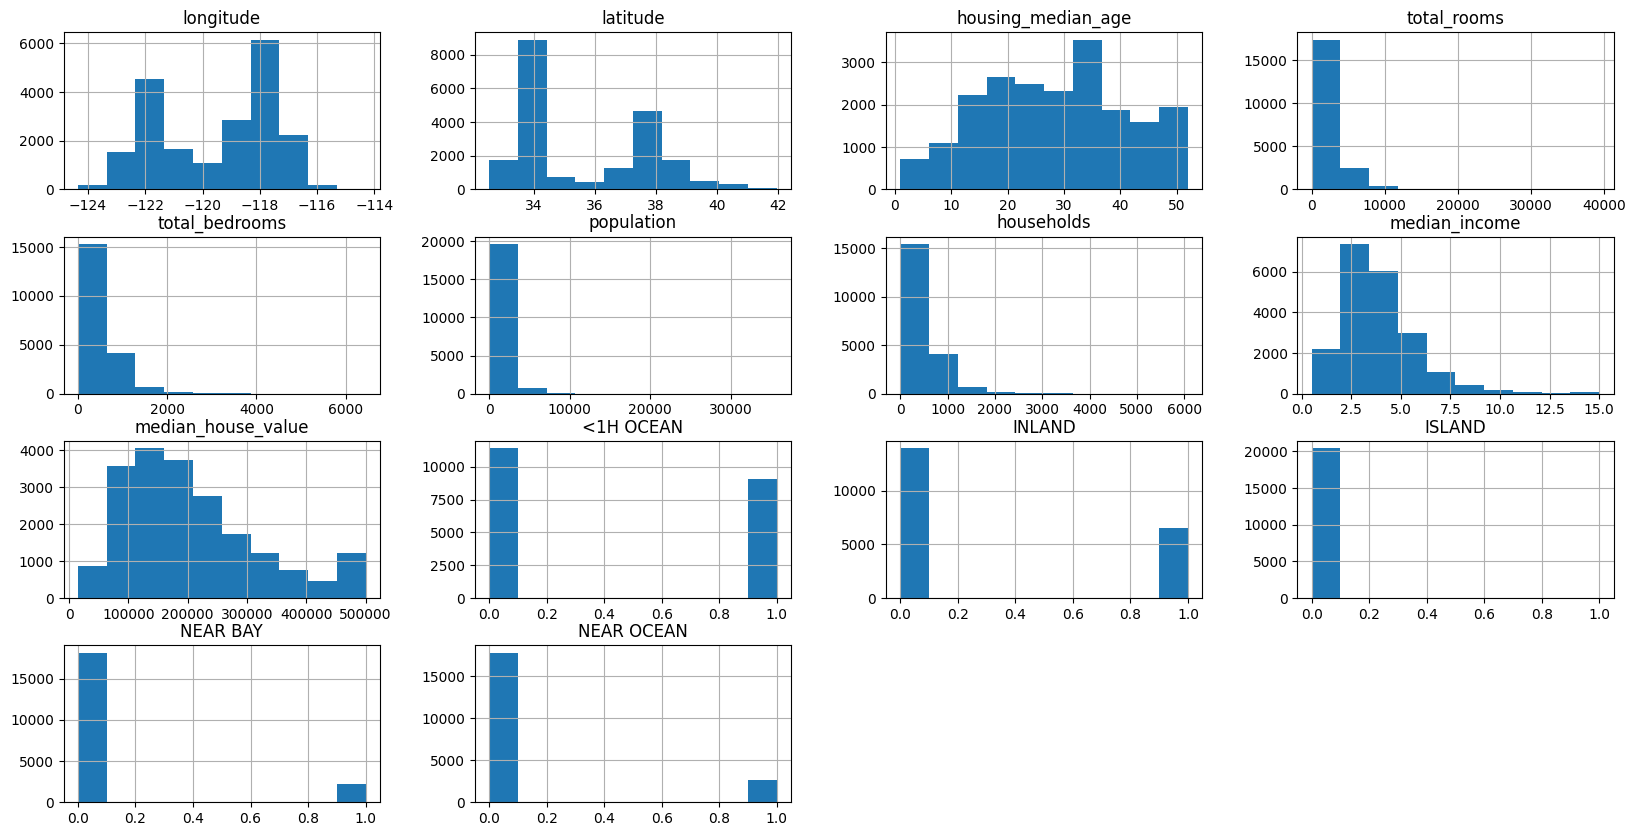

In [103]:
data.hist(figsize=(20,10))
plt.show()

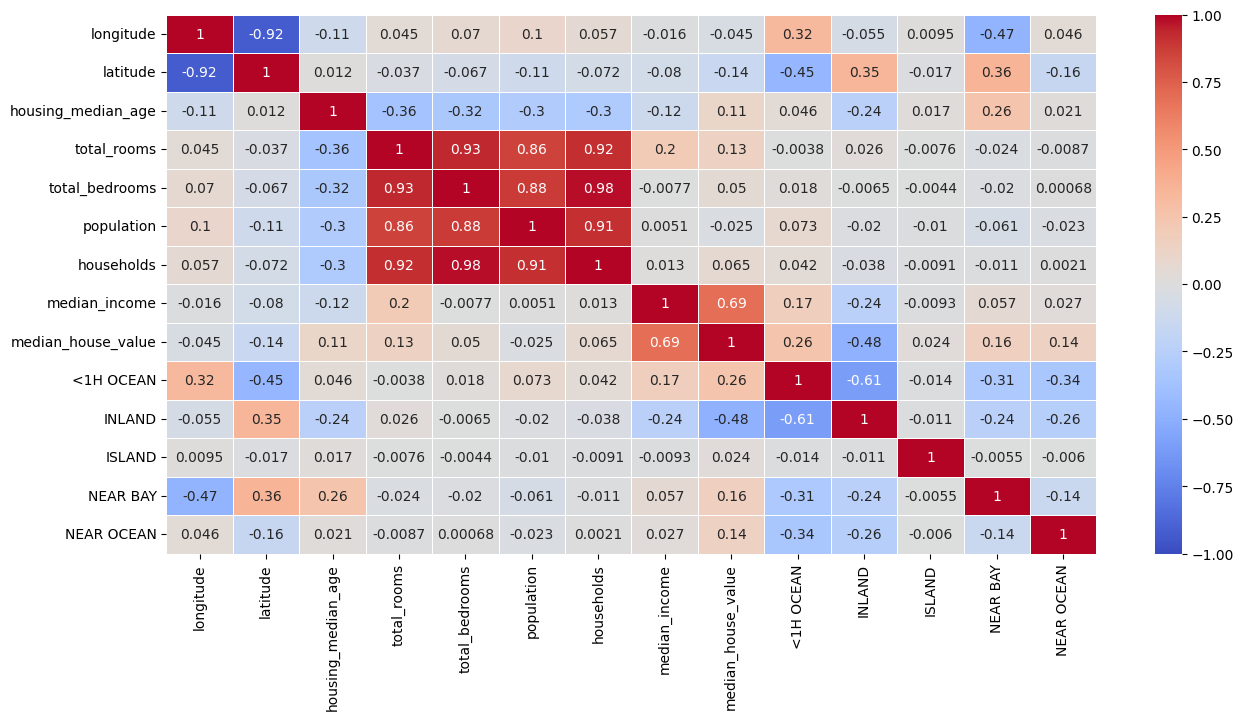

In [104]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

### Feature engineering

In [105]:
data["bedroom_per_room"]=data["total_bedrooms"]/data["total_rooms"]
data["rooms_per_household"]=data["total_rooms"]/data["households"]

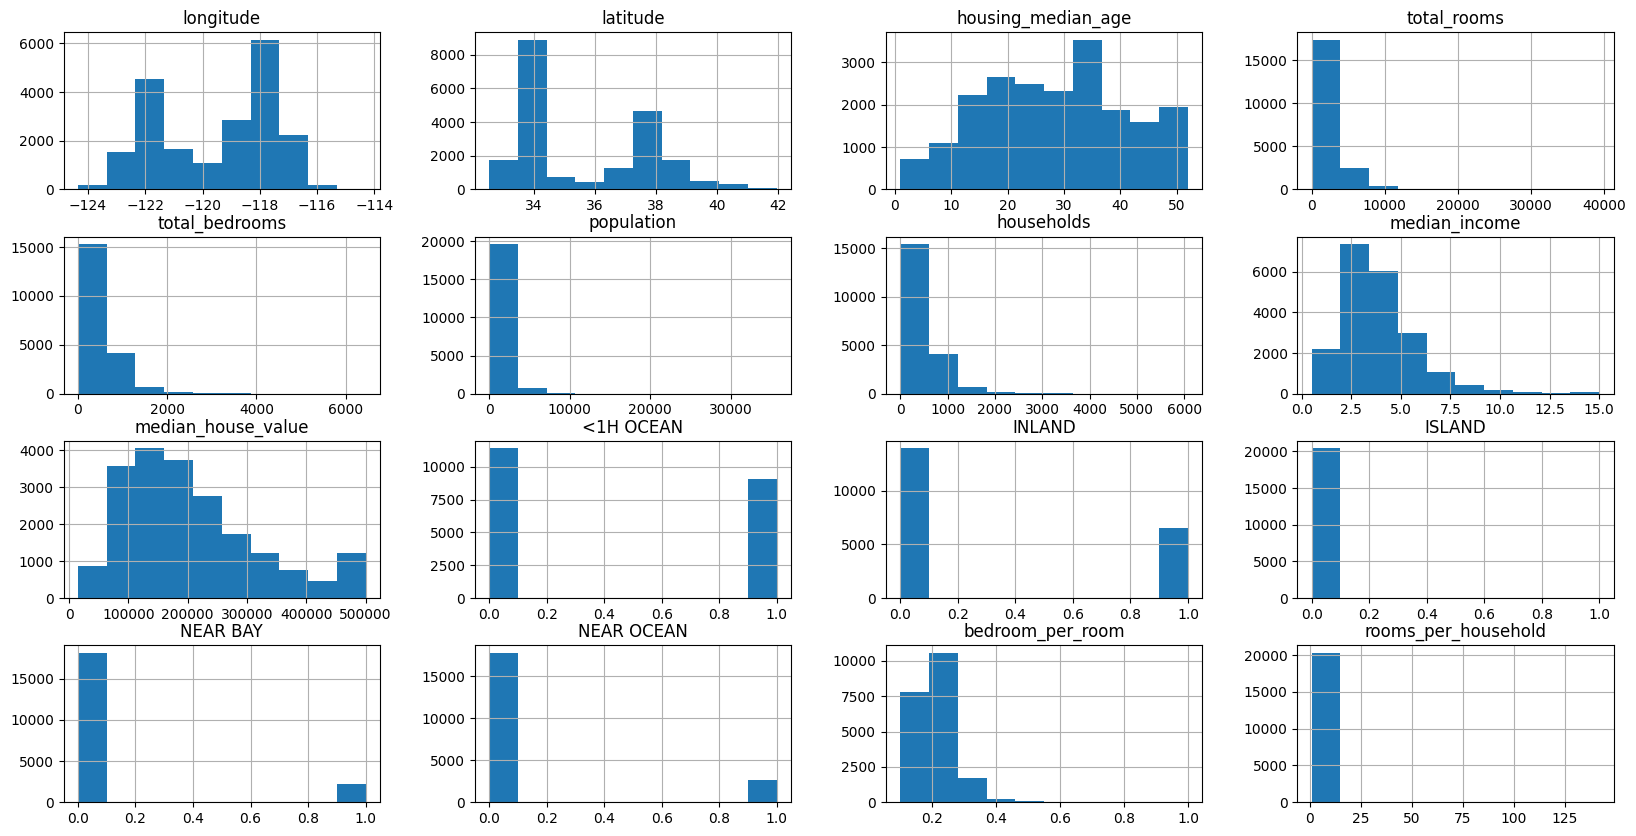

In [106]:
data.hist(figsize=(20,10))
plt.show()

### Log transformation

In [107]:
columns_list = ['total_rooms','total_bedrooms','population','households',"bedroom_per_room","rooms_per_household"]
for column in columns_list:
    data[column]=np.log(data[column]+1)

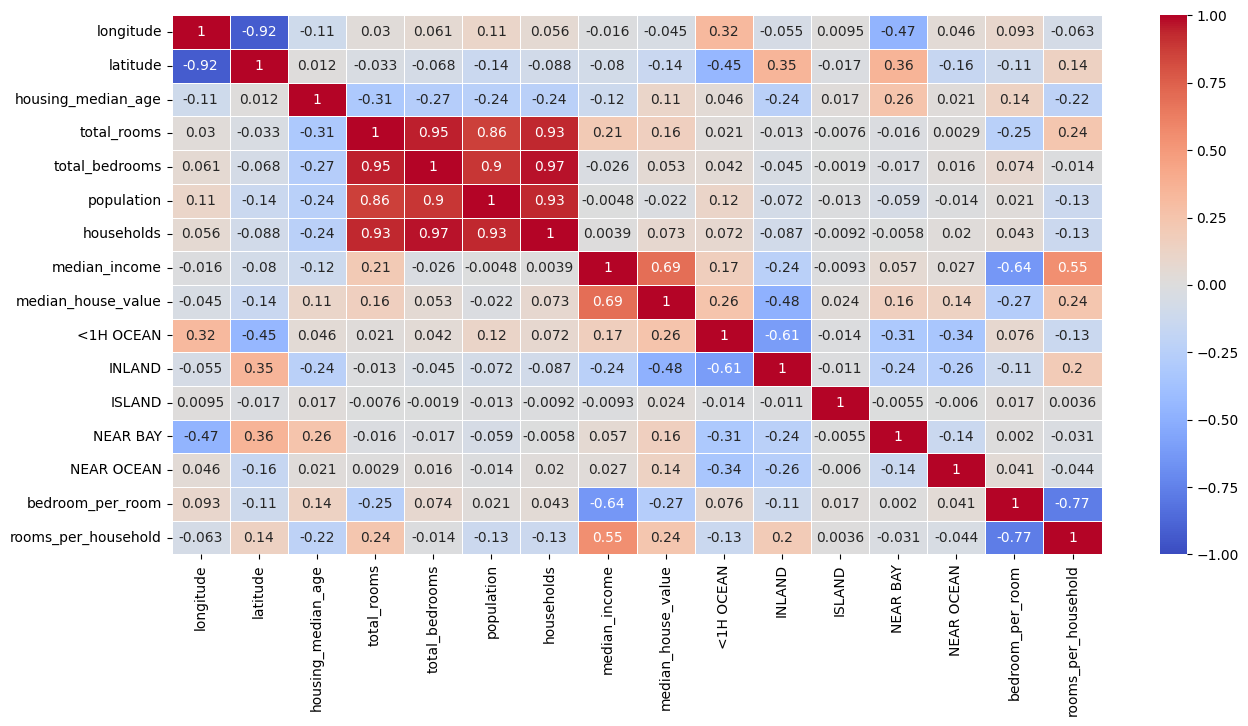

In [108]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

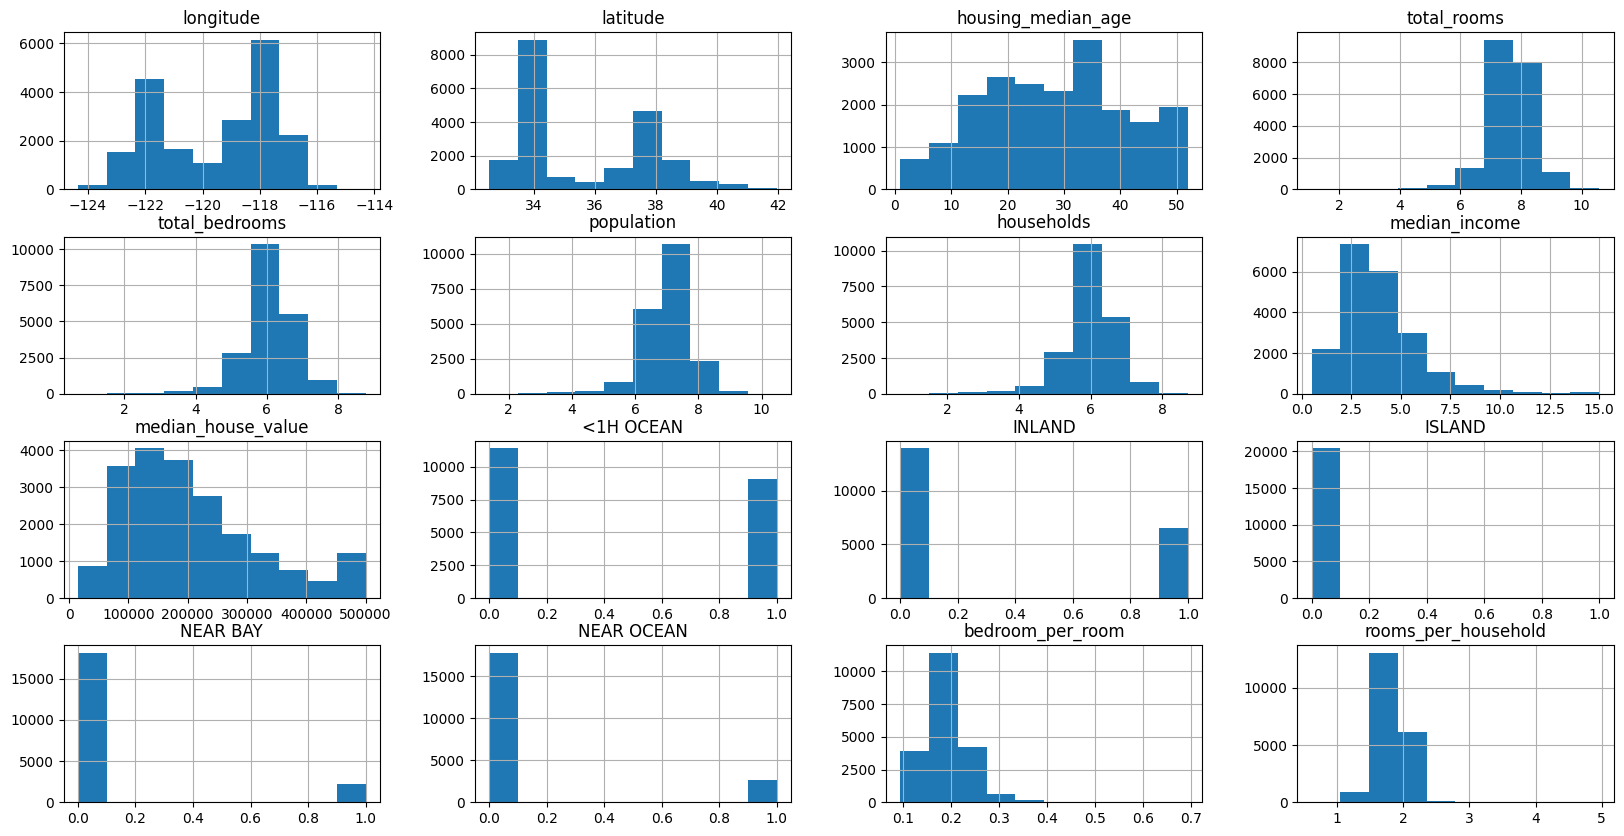

In [109]:
data.hist(figsize=(20,10))
plt.show()

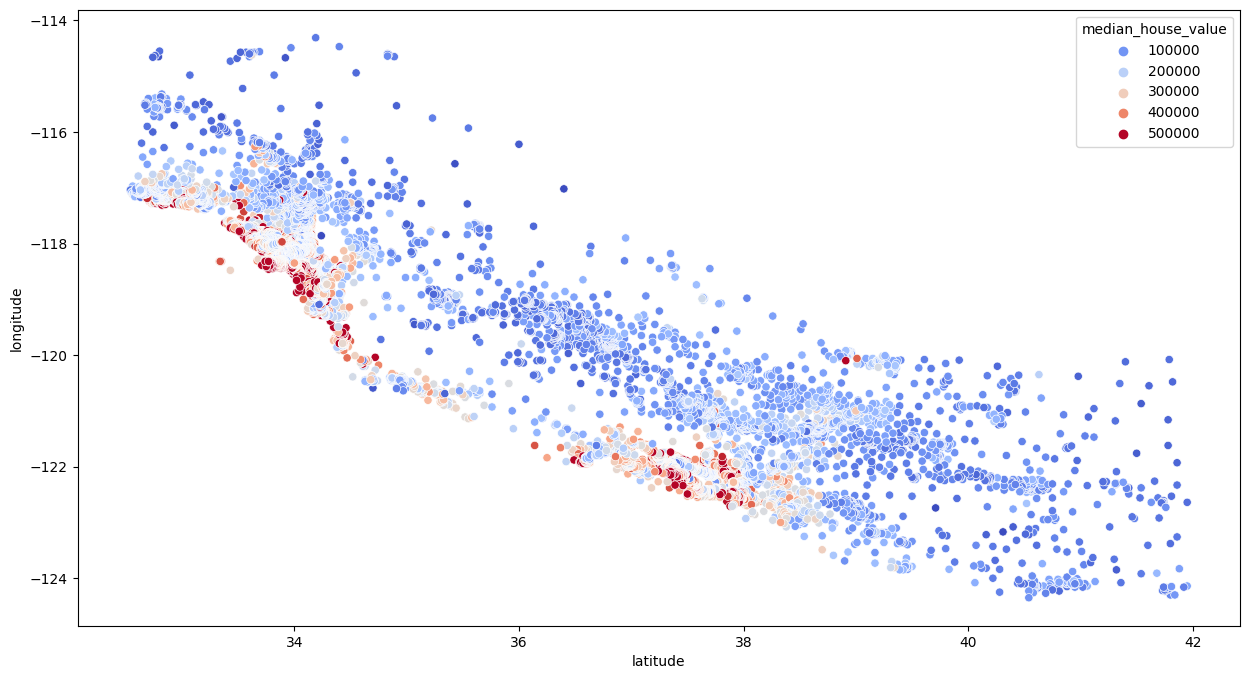

In [110]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=data, hue="median_house_value", palette="coolwarm")
plt.show()

## Splitting and standardising

In [111]:
X = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 33)

In [113]:
from sklearn.preprocessing import StandardScaler
# Crating a standard scaler object
scaler=StandardScaler()
# using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
# here using transform only to avoid data leakage
X_test=scaler.transform(X_test)

## Linear Regression

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

In [115]:
reg.score(X_test,y_test)

0.6646301648400851

In [116]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R2: ',r2)
print('RMSE: ', rmse)
linear_regression = ('Linear_regression', r2, rmse)

R2:  0.6646301648400851
RMSE:  67254.81971542095


## Decision Trees

Tree based algorithms doesn't really need scaling, regardless the scaled data will be fiited.

In [117]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree = tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.6481881270784671

In [118]:
y_pred=tree.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R2: ',r2)
print('RMSE: ', rmse)  
decision_tree = ('Decision tree', r2, rmse)

R2:  0.6481881270784671
RMSE:  68883.73068375945


## K-Nearest Neighbors Regressor

In [119]:
from sklearn.neighbors import KNeighborsRegressor

In [120]:
knn = KNeighborsRegressor()
knn = tree.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6516097748840782

In [121]:
y_pred=tree.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R2: ',r2)
print('RMSE: ', rmse)
knn_reg = ('KNN regressor', r2, rmse)

R2:  0.6516097748840782
RMSE:  68547.93793479243


## Random forest

In [93]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=33)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.8184692346021512

In [94]:
y_pred=forest.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R2: ',r2)
print('RMSE: ', rmse)  

R2:  0.8184692346021512
RMSE:  49480.77959501561


## Hyperparmeter tuning

As Random Forest Regressor returns significantly higher score than the other models tried, we can try to adjust the hyperparameters here.
In cross validation, we take the data and split it into k folds with K being a number. if we split into k = 5, we use all but 1 for training, and 1 for evuluation.  and this is repeated for all possible combinations

In [24]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators" : [200, 250, 300],
    "min_samples_split" : [2, 3],
    "max_depth" : [None, 2, 3, 4]  
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error",return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2, 3, 4],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 250, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
grid_search.best_estimator_ 

RandomForestRegressor(n_estimators=300)

In [26]:
grid_search.best_estimator_ .score(X_test, y_test)

0.8222726639996577

In [123]:
pred = grid_search.best_estimator_.predict(X_test)

r2 = r2_score(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('R2: ', r2)
print('RMSE: ', rmse)
random_forest = ('Random Forest', r2, rmse)

R2:  0.8222726639996577
RMSE:  48959.675393369056


The scores did imporved but not by any significant amount. More tuning can be done, but due to high computational time I've decided to stick with these results

## Feature importance

In [29]:
rand = grid_search.best_estimator_ 
feature_importance=pd.DataFrame(data=rand.feature_importances_,
             index=X.columns,
             columns=["importance"])

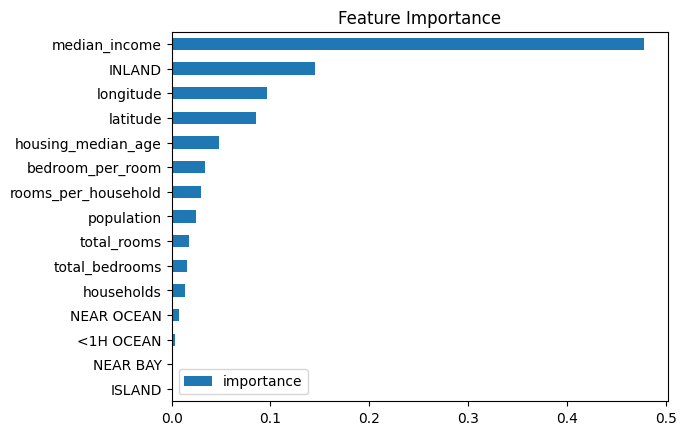

In [31]:
feature_importance.sort_values("importance").plot(kind='barh',title='Feature Importance')
plt.show()

## Results

In [129]:
df_results = pd.DataFrame([linear_regression, knn_reg, decision_tree, random_forest], columns=['model','R2','RMSE'])
df_results.sort_values('R2',ascending=False, ignore_index=True)

,model,R2,RMSE
0,Random Forest,0.822273,48959.675393
1,Linear_regression,0.664630,67254.819715
2,KNN regressor,0.651610,68547.937935
3,Decision tree,0.648188,68883.730684


We can see that Random forest performs significantly better than the other models